<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/ClassificationModels/Common_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

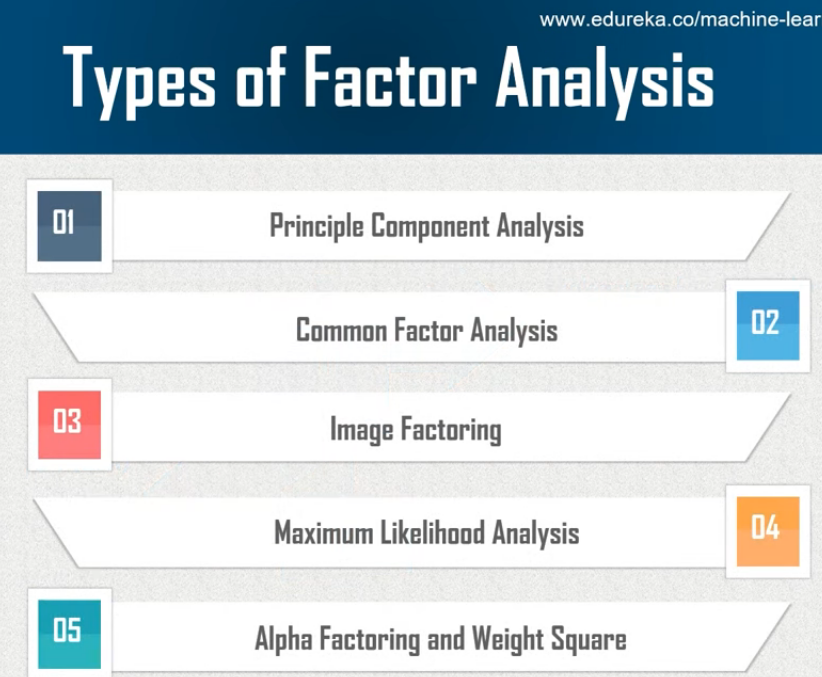

# Library Section

In [ ]:
!pip install factor_analyzer

In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

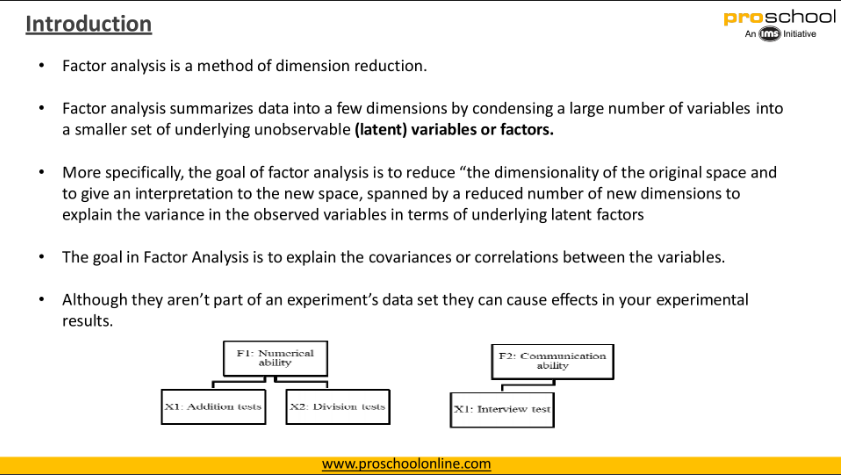

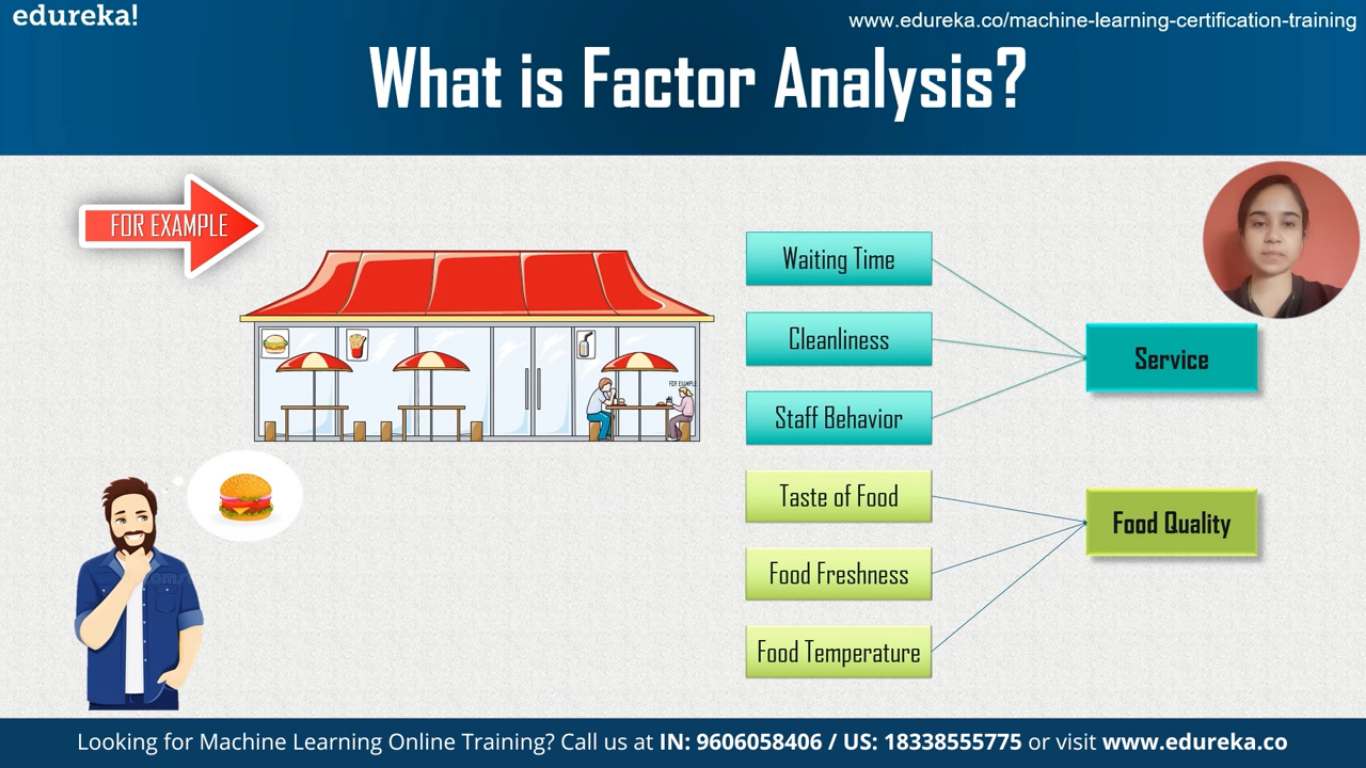

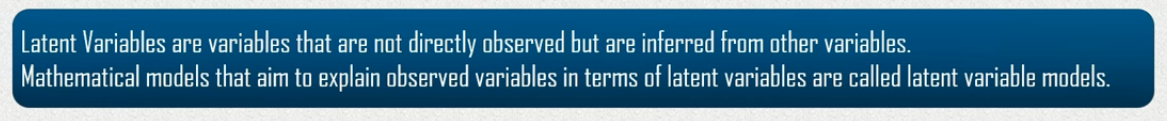

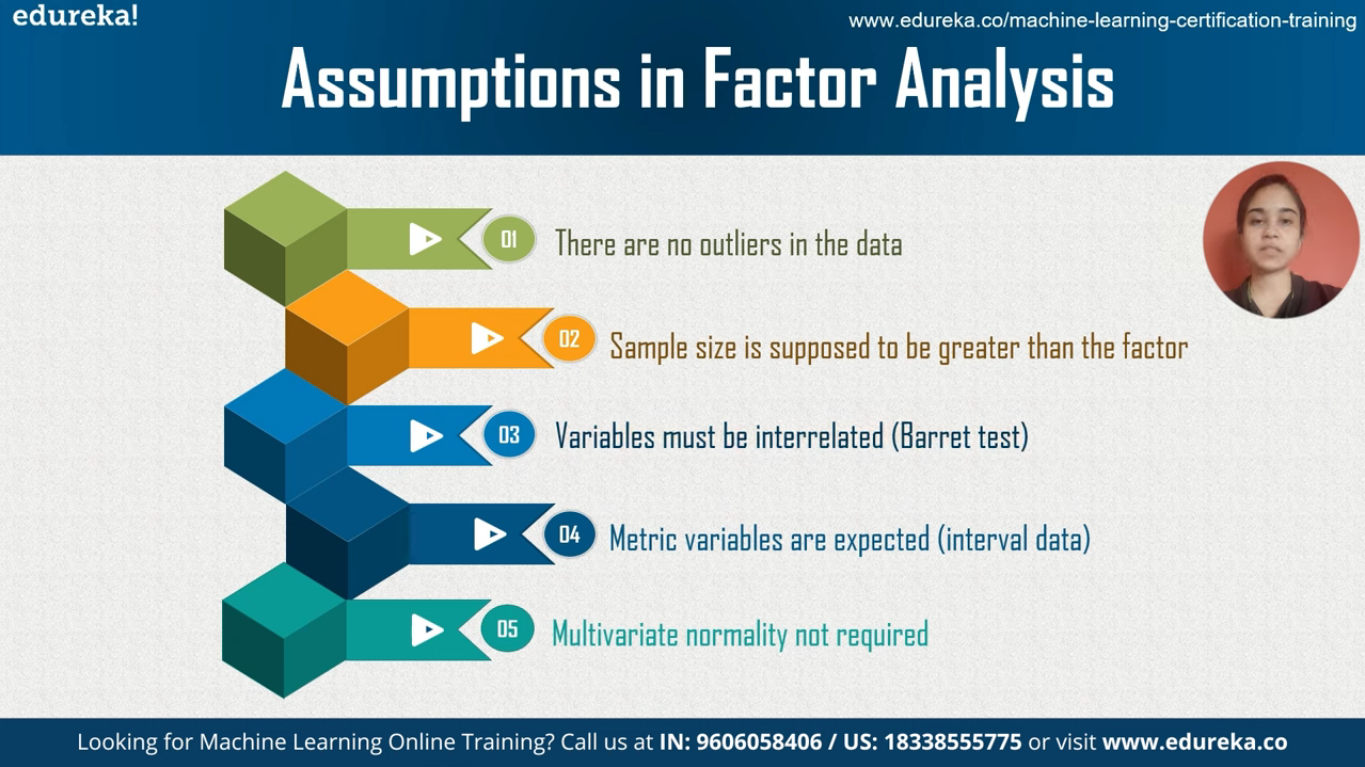

## Issues with  Factor Analysis
1. How to use factor analysis
2. How to interpret Factors
3. PCA Lena hai ya fir FA?

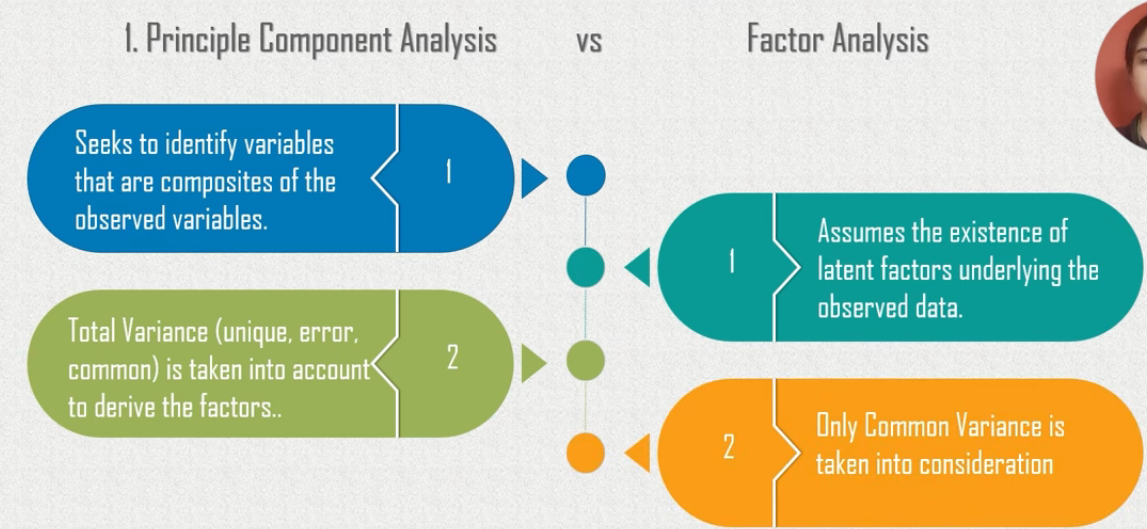

##when number of variables are more than 30 PCA or FA anything can be used

# Load Data

In [15]:
# Mounting the drive for loading the data
drive.mount('/content/drive')
!ls '/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/Factor Analysis'
data = pd.read_csv('/content/drive/MyDrive/Data Science Learning Path/IMS Proschool/Factor Analysis/women_track_records.csv')
data.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
women_track_records.csv


COUNTRY     X1     X2     X3    X4    X5    X6      X7
0  Argentina  11.61  22.94  54.50  2.15  4.43  9.79  178.52
1  Australia  11.20  22.35  51.80  1.98  4.13  9.08  152.37
2    Austria  11.43  23.09  50.62  1.99  4.22  9.34  159.37
3    Belgium  11.41  23.04  52.00  2.00  4.14  8.88  157.85
4    Bermuda  11.46  23.05  53.30  2.16  4.58  9.81  169.98

# Exploratory Data Analysis

In [30]:
data.shape

(55, 8)

In [31]:
X = data.iloc[:, 1:8]

## Create correlation function

In [32]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

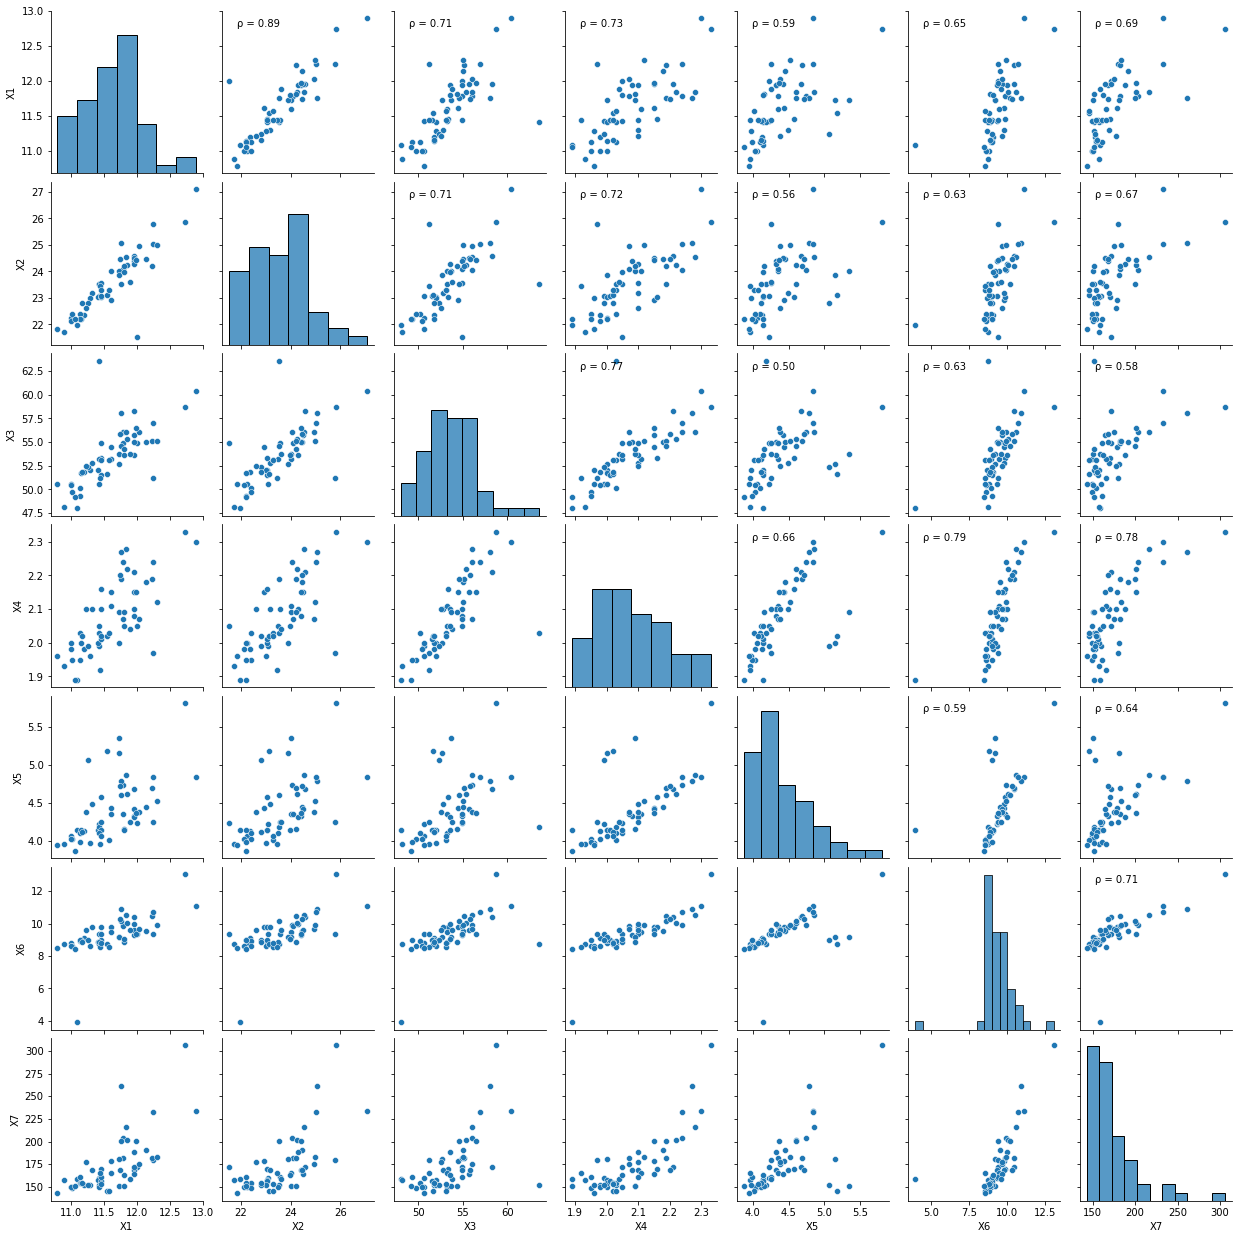

In [33]:
g=sns.pairplot(data=X, palette = 'husl')
g.map_upper(corrfunc)
plt.show()

## Bartlett’s test of sphericity

checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [47]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
round(chi_square_value,2), round(p_value,2)

(320.54, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.  
<span style="color:red"> ***Remember always P low Null Go*** </span>

##Kaiser-Meyer-Olkin (KMO) 
Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [48]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.8866604207395925

The overall KMO for our data is 0.88, which is excellent. This value indicates that you can proceed with your planned factor analysis.

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [20]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, rotation="varimax", method="principal", 
                    is_corr_matrix=False)
fa.fit(X_scaled)

FactorAnalyzer(method='principal', n_factors=2, rotation='varimax',
               rotation_kwargs={})

# How to know how many factors to take?

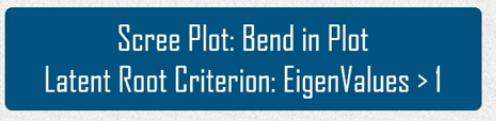

In [50]:
print("Eigenvalues:")
print(fa.get_eigenvalues()[0])

Eigenvalues:
[5.06759677 0.6020256  0.44429295 0.36590389 0.26931274 0.13929091
 0.11157713]


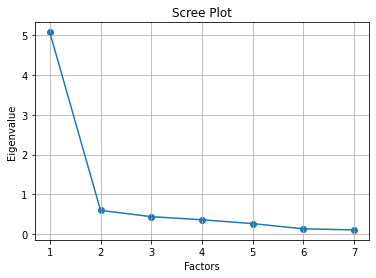

In [49]:
ev, v = fa.get_eigenvalues()
# Create scree plot using matplotlib
plt.scatter(range(1,X_scaled.shape[1]+1),ev)
plt.plot(range(1,X_scaled.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors

**
1. What are the factor loadings? 

The factor loading is a matrix which shows the relationship of each variable to the underlying factor. It shows the correlation coefficient for observed variable and factor. It shows the variance explained by the observed variables. 

2. What is Eigenvalues? 

Eigenvalues represent variance explained each factor from the total variance. It is also known as characteristic roots.


4. What is Factor Rotation? 

Rotation is a tool for better interpretation of factor analysis. Rotation can be orthogonal or oblique. It re-distributed the commonalities with a clear pattern of loadings.

**

In [36]:
print("Factor Loadings:")
print(fa.loadings_)

Factor Loadings:
[[0.8399412  0.3971186 ]
 [0.86109019 0.35646657]
 [0.81415209 0.33674071]
 [0.61543129 0.6852183 ]
 [0.22614824 0.86316553]
 [0.48965453 0.7060452 ]
 [0.46668107 0.74906952]]


Factor 1 → speed factor
Factor 2 → tolerance or endurance factor

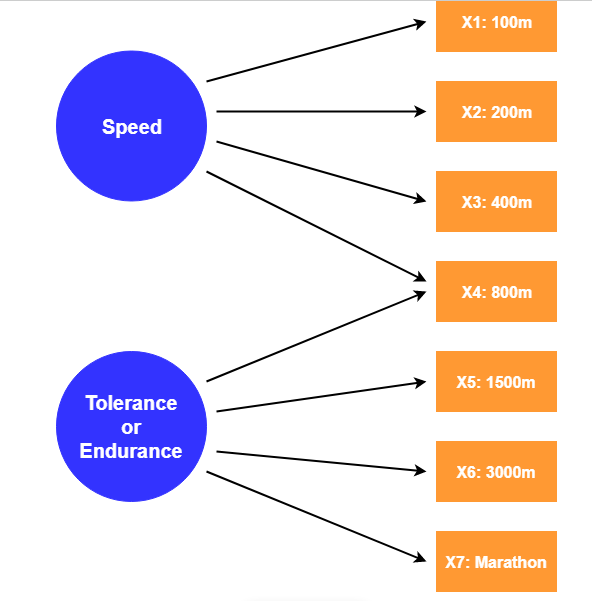

3. What are Communalities? 

Commonalities are the sum of the squared loadings for each variable. It represents the common variance. It ranges from 0-1 and value close to 1 represents more variance. 


In [34]:
print("Communalities")
print(fa.get_communalities())

Communalities
[0.8632044  0.86854473 0.77623794 0.84827979 0.79619776 0.73826138
 0.77889637]



**X1**: 86% of Variance of X1 explained by 2 factors we chose

**X2**: 86% of Variance of X1 explained by 2 factors we chose

**X3**: 77% of Variance of X1 explained by 2 factors we chose

**X4**: 84% of Variance of X1 explained by 2 factors we chose

**X5**: 79% of Variance of X1 explained by 2 factors we chose

**X6**: 73% of Variance of X1 explained by 2 factors we chose

**X7**: 77% of Variance of X1 explained by 2 factors we chose

 ***Clearly, a high variance of all variables is explained by the two factors that we selected.***

In [35]:
print("Specific Variances:")
print(fa.get_uniquenesses())


Specific Variances:
[0.1367956  0.13145527 0.22376206 0.15172021 0.20380224 0.26173862
 0.22110363]



In [42]:
pd.DataFrame(fa.get_factor_variance(), index = ['SS Loadings','Proportion var','Cumulative Var'], columns=['Factor1', 'Factor2'])

Factor1   Factor2
SS Loadings     2.997273  2.672350
Proportion var  0.428182  0.381764
Cumulative Var  0.428182  0.809946